<a href="https://colab.research.google.com/github/roshni33/100-days-of-AI/blob/main/Boston_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRFRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
#loading dataset
df = pd.read_csv('/content/housing.csv')

In [3]:
#top 5 rows
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
#finding if there are any null values in each column
df.isnull().sum()     #no null values

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


In [5]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Understanding correlation between variables

+ve correlation - if one value increases so the other also increases

-ve correlation - if one value decreases so the other also decreases

HEAT MAP

In [6]:
correlation = df.corr()   #correlation function - corr()

In [8]:
plt.figure(figsize=(10,10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Axes: >

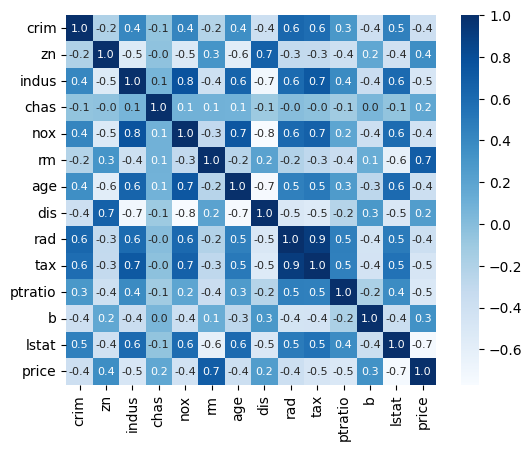

In [9]:
sns.heatmap(correlation,cbar=True,cmap='Blues',annot=True,annot_kws={'size':8},square=True,fmt='.1f')

In [10]:
X=df.drop(columns='price')
Y=df['price']

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [13]:
print(X.shape,X_train.shape,X_test.shape)

(506, 13) (404, 13) (102, 13)


model development and Evaluation

In [47]:
#Linear Regression
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)
train_data_pred = model.predict(X_train)
from sklearn import metrics
score1 = metrics.r2_score(Y_train,train_data_pred)
score2 = metrics.mean_absolute_error(Y_train,train_data_pred)
print("R-Squared error - ",score1)
print("Mean-absolute-error - ",score2)

print("----------")
test_data_pred = model.predict(X_test)
score1 = metrics.r2_score(Y_test,test_data_pred)
score2 = metrics.mean_absolute_error(Y_test,test_data_pred)
print("R-Squared error - ",score1)
print("Mean-absolute-error - ",score2)

R-Squared error -  0.7285831776605591
Mean-absolute-error -  3.3844575399167973
----------
R-Squared error -  0.7789207451814409
Mean-absolute-error -  3.1130437468934384


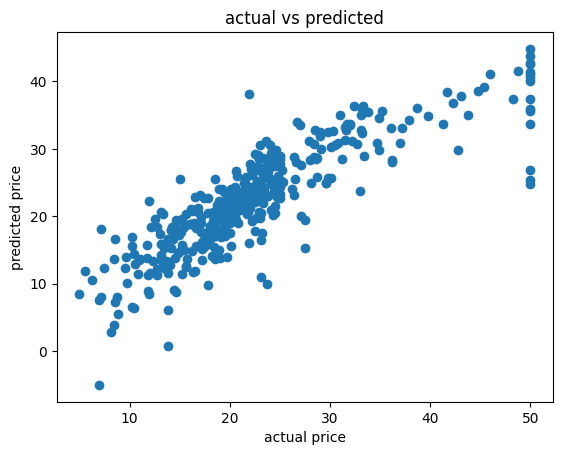

In [48]:
plt.scatter(Y_train,train_data_pred)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual vs predicted")
plt.show()

In [49]:
#knn
from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor()
model.fit(X_train,Y_train)
train_data_pred = model.predict(X_train)
from sklearn import metrics
score1 = metrics.r2_score(Y_train,train_data_pred)
score2 = metrics.mean_absolute_error(Y_train,train_data_pred)
print("R-Squared error - ",score1)
print("Mean-absolute-error - ",score2)

print("----------")
test_data_pred = model.predict(X_test)
score1 = metrics.r2_score(Y_test,test_data_pred)
score2 = metrics.mean_absolute_error(Y_test,test_data_pred)
print("R-Squared error - ",score1)
print("Mean-absolute-error - ",score2)

R-Squared error -  0.6792888271229396
Mean-absolute-error -  3.5709405940594054
----------
R-Squared error -  0.6585650274571211
Mean-absolute-error -  3.9190196078431367


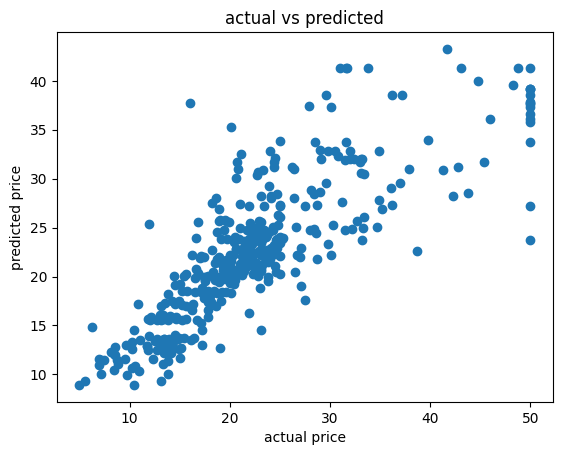

In [50]:
plt.scatter(Y_train,train_data_pred)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual vs predicted")
plt.show()

In [51]:
#SVM with Hyperparameters
from sklearn.svm import SVR
model=SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
model.fit(X_train,Y_train.ravel())
train_data_pred = model.predict(X_train)
from sklearn import metrics
score1 = metrics.r2_score(Y_train,train_data_pred)
score2 = metrics.mean_absolute_error(Y_train,train_data_pred)
print("R-Squared error - ",score1)
print("Mean-absolute-error - ",score2)

print("----------")
test_data_pred = model.predict(X_test)
score1 = metrics.r2_score(Y_test,test_data_pred)
score2 = metrics.mean_absolute_error(Y_test,test_data_pred)
print("R-Squared error - ",score1)
print("Mean-absolute-error - ",score2)

R-Squared error -  0.9998835800928915
Mean-absolute-error -  0.0986856654705581
----------
R-Squared error -  0.20475379438497499
Mean-absolute-error -  5.862807561665087


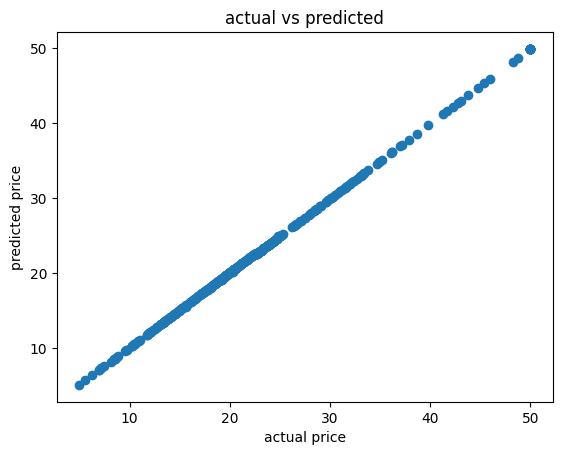

In [52]:
plt.scatter(Y_train,train_data_pred)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual vs predicted")
plt.show()

In [62]:
#decision tree
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(X_train,Y_train)
train_data_pred = model.predict(X_train)
from sklearn import metrics
score1 = metrics.r2_score(Y_train,train_data_pred)
score2 = metrics.mean_absolute_error(Y_train,train_data_pred)
print("R-Squared error - ",score1)
print("Mean-absolute-error - ",score2)

print("----------")
test_data_pred = model.predict(X_test)
score1 = metrics.r2_score(Y_test,test_data_pred)
score2 = metrics.mean_absolute_error(Y_test,test_data_pred)
print("R-Squared error - ",score1)
print("Mean-absolute-error - ",score2)


R-Squared error -  1.0
Mean-absolute-error -  0.0
----------
R-Squared error -  0.742540024887312
Mean-absolute-error -  3.2039215686274507


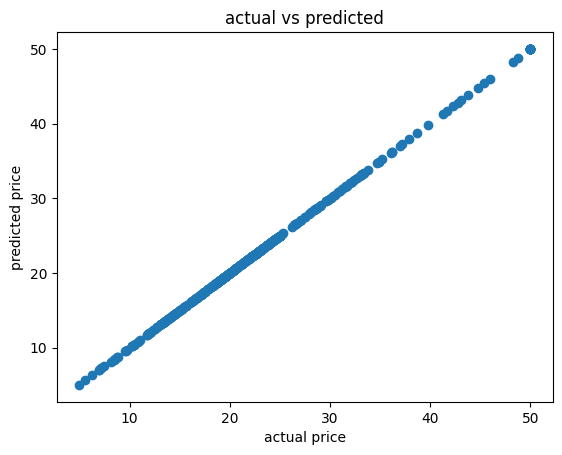

In [63]:
plt.scatter(Y_train,train_data_pred)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual vs predicted")
plt.show()

In [58]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,Y_train)
train_data_pred = model.predict(X_train)
from sklearn import metrics
score1 = metrics.r2_score(Y_train,train_data_pred)
score2 = metrics.mean_absolute_error(Y_train,train_data_pred)
print("R-Squared error - ",score1)
print("Mean-absolute-error - ",score2)

print("----------")
test_data_pred = model.predict(X_test)
score1 = metrics.r2_score(Y_test,test_data_pred)
score2 = metrics.mean_absolute_error(Y_test,test_data_pred)
print("R-Squared error - ",score1)
print("Mean-absolute-error - ",score2)

R-Squared error -  0.9820958025009117
Mean-absolute-error -  0.8248341584158408
----------
R-Squared error -  0.8916370999233187
Mean-absolute-error -  2.130705882352941


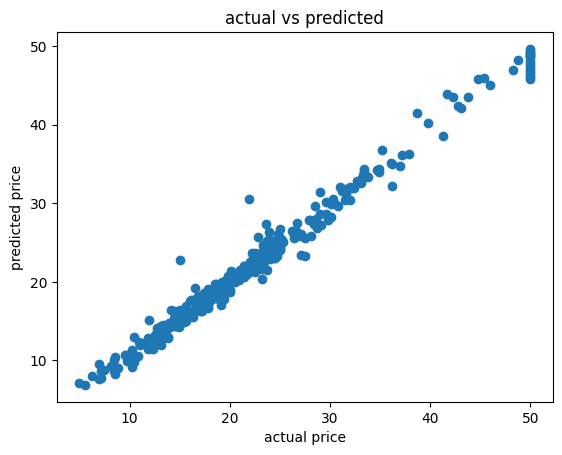

In [59]:
plt.scatter(Y_train,train_data_pred)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual vs predicted")
plt.show()

In [60]:
#xgboost
from xgboost import XGBRFRegressor
model=XGBRFRegressor()
model.fit(X_train,Y_train)
train_data_pred = model.predict(X_train)
from sklearn import metrics
score1 = metrics.r2_score(Y_train,train_data_pred)
score2 = metrics.mean_absolute_error(Y_train,train_data_pred)
print("R-Squared error - ",score1)
print("Mean-absolute-error - ",score2)
print("-----------")
test_data_pred = model.predict(X_test)
score1 = metrics.r2_score(Y_test,test_data_pred)
score2 = metrics.mean_absolute_error(Y_test,test_data_pred)
print("R-Squared error - ",score1)
print("Mean-absolute-error - ",score2)

R-Squared error -  0.9621800860255965
Mean-absolute-error -  1.4039148864179556
-----------
R-Squared error -  0.924004679760095
Mean-absolute-error -  1.9609979629516596


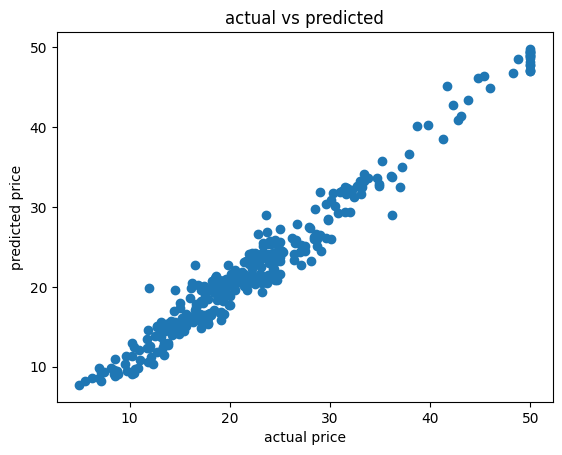

In [61]:
plt.scatter(Y_train,train_data_pred)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual vs predicted")
plt.show()

XGBoost is the best algorithm for this model